<a href="https://colab.research.google.com/github/tada20001/NLP_2023/blob/main/CH19_01_%EC%9E%A0%EC%9E%AC%EC%9D%98%EB%AF%B8_%EB%B6%84%EC%84%9D(Latent_Semantic_Analysis%2C_LSA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

토픽모델링(LDA)은 토픽이라는 문서집합에서 주제를 도출하기 위한 통계모델 중 하나, 텍스트 본문에서 숨겨진 의미구조를 발견하기 위해 사용되는 텍스트 마이닝 기법


LSA는 토픽모델링을 위해 최적화된 알고리즘은 아니지만, 토픽 모델링이라는 분야에 아이디어를 제공한 알고리즘임. 

BoW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있음. 이를 위한 대안으로 DTM의 잠재된(Latent) 의미를 이끌어내는 방법으로 잠재의미분석(LSA, Latent Semantic Analysis) 방법이 있음. 잠재의미분석(Latent Semantic Indexing, LSI)이라고 부르기도 함

이 방법을 이해하기 위해서는 선형대수학의 특이값 분해(Singulary Value Decomposition, SVD)를 이해해야 함. 


### 1. 특이값 분해(Singular Value Decomposition, SVD)
--------------
SVD란 A가 m × n 행렬일 때, 다음과 같이 3개의 행렬의 곱으로 분해(decomposition)하는 것을 말함.

$$A=UΣV^\text{T}$$

여기서 각 3개의 행렬은 다음의 조건을 만족해야 함
* $U: m × m\ \text{직교행렬}\ (AA^\text{T}=U(ΣΣ^\text{T})U^\text{T})$
* $V: n × n\ \text{직교행렬}\ (A^\text{T}A=V(Σ^\text{T}Σ)V^\text{T})$
* $Σ: m × n\ \text{직사각 대각행렬}$

여기서 직교행렬(orthogonal matrix)이란, 자신과 자신의 전치행렬(transposed matrix)의 곱 또는 이를 반대로 곱한 결과가 단위행렬(identity matrix)이 되는 행렬을 의미함. 

이때 SVD로 나온 대각 행렬의 대각 원소의 값을 행렬 A의 특이값(singular value)라고 함

#### 1) 전치행렬(Transposed Matrix)
전치행렬(transposed matrix)은 원래의 행렬에서 행과 열을 바꾼 행렬임. 즉, 주 대각선을 축으로 반사대칭을 하는 행렬임.


#### 2) 단위 행렬(Identity Matrix)
단위행렬은 주대각선의 원소가 모두 1이며 나머지 원소는 0인 정사각 행렬을 말함

#### 3) 역행렬(Inverse Matrix)
행렬 $A$와 어떤 행렬을 곱했을 때, 결과로서 단위행렬이 나온다면 이때의 어떤 행렬을 A의 역행렬이라고 하며 $A^{-1}$라고 함

$$A\ ×\ A^{-1} = I$$


#### 4) 직교행렬(Orthogonal matrix)
실수 $n × n$ 행렬 $A$에 대해 $A\ ×\ A^{T} = I$를 만족하면서 $A^{T}\ ×\ A = I$를 만족하는 행렬 $A$를 직교행렬이라고 함. 그런데 역행렬의 정의를 다시 생각해보면, 직교행렬은 $A^{-1}=A^{T}$를 만족함


#### 5) 대각 행렬(Diagonal matrix)
대각행렬은 주대각선을 제외한 곳의 원소가 모두 0인 행렬을 말함. 아래의 그림에서는 주대각선의 원소를 $a$라고 표현하고 있음


---------
여기에서.. SVD를 통해 나온 대각행렬 Σ은 추가적인 성질을 가지는데, 대각행렬 Σ의 주대각 원소를 행렬 A의 특이값(singular value)라고 하며, 이를 image.png라고 할때, 특이값 image.png은 내림차순으로 정렬되는 특징을 가짐



### 2. 절단된 SVD(Truncated SVD)
-------------
위에서 설명한 SVD를 full SVD라고 하지만, LSA의 경우 full SVD에서 나온 3개의 행렬에서 일부 벡터들을 삭제한 절단된 SVD(truncated SVD)를 사용하게 됨

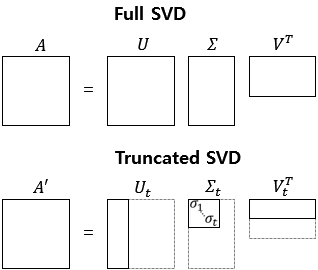

절단된 SVD는 대각 행렬 Σ의 대각 원소 값 중에서 상위 값 t개만 남게 됨. 절단된 SVD를 수행하면 값의 손실이 일어나므로 기존의 행렬 A로 복구할 수 없음. 

또한, U행렬과 V행렬의 t열까지만 남기게 됨. 여기에서 t는 우리가 찾고자 하는 토픽의수를 반영한 하이퍼파라미터 값이 됨. 

그러나 t를 선택하는 것은 쉽지 않은 일인데, t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 얻을 수 있지만, t를 갖게 잡아야만 노이즈를 제거할 수 있음.

이렇게 일부 벡터들을 삭제하는 것을 데이터의 차원을 줄인다고도 하는데, 데이터의 차원을 줄이게 되면 당연히 full SVD보다 직관적으로 계산비용이 낮아지는 효과도 얻을 수 있음.

계산비용이 낮아지는 것 외에도 상대적으로 중요하지 않은 정보를 삭제하는 효과도 갖고 있음. 이는 영상처리 분야에서는 노이즈를 제거한다는 의미를 갖고 있고, 자연어처리 분야에서는 설명력이 낮은 정보를 삭제한다는 의미를 가짐. 이 정보를 잠재의미로 부름

### 3. 잠재의미분석(Latent Semantic Analysis, LSA)
----------------
기존의 DTM이나 DTM에 단어의 중요도에 따른 가중치를 주었던 TF-IDF 행렬은 단어의 의미를 전혀 고려하지 못한다는 단점을 갖고 있음. LSA는 기본적으로 DTM이나 TF-IDF 행렬에 절단된 SVD(truncated SVD)를 사용하여 차원을 축소시키고, 단어들의 잠재적인 의미를 끌어낸다는 아이디어를 갖고 있음.

#### 1) Full SVD



In [1]:
import numpy as np

예를 들어...

In [2]:
A = np.array([
    [0, 0, 0, 1, 0, 1, 1, 0, 0], 
    [0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 1, 0, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 1]
])

print('DTM 크기(shape):', A.shape)

DTM 크기(shape): (4, 9)


In [3]:
# full SVD 수행
## 대각행렬 변수명을 S로 사용, V의 전치행렬은 VT로 함

In [4]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
print('행렬 U :')
print(U.round(2))
print('행렬 U의 크기(shape):', np.shape(U))

행렬 U :
[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]
행렬 U의 크기(shape): (4, 4)


In [5]:
print('특이값 벡터 :')
print(s.round(2))
print('특이값 벡터의 크기(shape):', np.shape(s))

특이값 벡터 :
[2.69 2.05 1.73 0.77]
특이값 벡터의 크기(shape): (4,)


Numpy의 linalg.svd()는 특이값 분해 결과로 대각행렬이 아니라, 특이값 리스트를 반환함. 따라서 이를 다시 대각 행렬로 바꿔줘야 함.

In [6]:
# 대각 행렬의 크기인 4 x 9의 임의행렬을 생성
S = np.zeros((4, 9))

# 특이값을 대각행렬에 삽입
S[:4, :4] = np.diag(s)

print('대각 행렬 S :')
print(S.round(2))

대각 행렬 S :
[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


4 x 9의 크기를 가지는 대각 행렬 S가 생성되었으며, 대각 행렬이 내림차순으로 나열되어 있음

In [7]:
print('직교행렬 VT:')
print(VT.round(2))

print('직교행렬 VT의 크기(shape) :')
print(VT.shape)

직교행렬 VT:
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]
직교행렬 VT의 크기(shape) :
(9, 9)


9 x 9 크기를 가지는 직교행렬 VT(V의 전치행렬)이 생성되었음. 즉 U x S x VT를 하면 기존 행렬 A가 나와야 함. Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴함. 이를 사용하여 정말로 기존의 행렬 A와 동일한지 확인해 봄.

In [8]:
np.allclose(A, np.dot(np.dot(U, S), VT).round(2))

True

#### 2) 절단된 SVD(Truncated SVD)

이제 t를 정하고 절단된 SVD(Truncated SVD)를 수행함. 여기서는 t=2로 대각 행렬 S내의 특이값 중에서 상위 2개만 남기고 제거하도록 함

In [9]:
# 특이값 상위 2개만 보존
S = S[:2, :2]
S.round(2)

array([[2.69, 0.  ],
       [0.  , 2.05]])

In [10]:
# 상위 2개의 값만 남기고 나머지는 모두 제거
U = U[:, :2]
print('행렬 U:')
print(U.round(2))

행렬 U:
[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


2개의 열만 남기고 모두 제거됨. 이제 행렬 V의 전치 행렬인 VT에 대해 2개의 행만 남기고 제거함.

In [11]:
VT = VT[:2, :]
print('직교행렬 VT :')
print(VT.round(2))

직교행렬 VT :
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [12]:
A_prime = np.dot(np.dot(U, S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


대체로 기존에 0인 값들은 0에 가까운 값으로 대체된 것으로 볼 수 있음. 또한, 값이 제대로 복구되지 않은 구간도 존재함. 

이제 이렇게 차원이 축소된 U, S, VT의 크기가 어떤 의미를 갖고 있는지 알아보자.

축소된 U는 4 x 2의 크기를 가지는데, 이는 문서의 갯수 x 토픽의 수 t의 크기임. 단어의 개수인 9는 유지되지 않는데, 문서의 개수인 4의 크기는 유지됨. 

이 문서 벡터들과 단어벡터들을 통해 다른 문서와의 유사도, 다른 단어와의 유사도, 단어(쿼리)로부터 문서의 유사도를 구할 수 있음


### 4. 실습을 통한 이해
-----------
scikitleran에서 Twenty Newsgroup의 20개 주제의 뉴스그룹 데이터셋을 제공함. LSA를 사용해서 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행함

#### 1) 뉴스그룹 데이터에 대한 이해

In [13]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [14]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [15]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

뉴스그룹 데이터에는 특수문자 포함된 다수의 영어문장으로 구성되어 있음. 이런 형식의 샘플이 총 11,314개 존재함. 그리고 target_name에는 뉴스그룹의 20개 카테고리가 저장되어 있음

In [16]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### 2) 텍스트 전처리

시작하기 앞서, 텍스트 데이터에 대해 가능한 정제과정을 거쳐야 함. 기본적인 아이디어는 알파벳을 제외한 나머지를 제거하는 것임.

In [18]:
news_df = pd.DataFrame({'document': documents})

# 특수문자 제거
news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ')

# 길이가 3 이하인 단어 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-18-c7b7e365bfe1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ')


정제전, 후에 대한 차이 확인!!

In [19]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

이번에는 데이터에서 불용어를 제거함. 제거하기 위해 우선 토큰화를 우선 수행하였고, 토큰화와 불용어 제거를 순차적으로 진행함

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# NTTK로부터 불용어를 받아옴
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())  # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [24]:
# 확인!!
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


#### 3) TF-IDF 행렬 만들기

불용어 제거를 위해 토큰화 작업을 수행했으나, TfidfVectorize는 기본적으로 토큰화가 되어 있지 않은 텍스트 데이터를 입력으로 사용함. 

따라서 TfidfVectorizer를 사용해서 TF-IDF 행렬을 만들기 위해 다시 토큰화 작업을 역으로 취소하는 작업을 수행함. 이를 역토큰화(Detokenization)라고 함.

In [25]:
# 역토큰화
detokenized_doc = []

for i in range(len(news_df)):
  t = ' '.join(tokenized_doc[i])
  detokenized_doc.append(t)
news_df['clean_doc'] = detokenized_doc

In [26]:
# 확인
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

불용어가 제거되었지만 토큰화는 수행되지 않은 형태가 됨.

이제 TfidfVecotrizer를 통해 단어 1,000개에 대해 TF-IDF 행렬을 만들것임. 모든 단어가 아닌 1,000개만..

In [27]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

# TF-IDF 행렬 크기 확인
X.shape

(11314, 1000)

In [28]:
len(news_df)

11314

#### 4) 토픽 모델링(Topic Modeling)
이제 TF-IDF 행렬을 다수의 행렬로 분해함. 여기에서는 사이킷런의 절단 SVD(Truncated SVD)를 사용함. 절단된 SVD를 사용하면 차원을 축소할 수 있음. 원래 기존 뉴스그룹 데이터가 20개의 카테고리를 갖고 있었기 때문에, 20개의 토픽을 가졌다고 가정하고 토픽 모델링을 시도함. 토픽의 숫자가 n_components의 파라미터로 지정이 가능함

In [30]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

여기서 svd_model.components_는 앞서 배운 LSA에서 VT에 해당함

In [31]:
np.shape(svd_model.components_) # 정확하게 토픽의 수 t x 단어의 수의 크기를 갖고 있음

(20, 1000)

In [36]:
terms = vectorizer.get_feature_names_out()  # 단어집합. 1,000개의 단어가 저장됨

def get_topics(components, feature_names, n=5):
  for idx, topic in enumerate(components):
    print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

각 20개의 행 1,000개 열 중 가장 값이 큰 5개의 값을 찾아 단어로 출력함

In [37]:
get_topics(svd_model.components_, terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

In [40]:
svd_model.components_[0]
len(svd_model.components_[0])

1000

### 5. LSA의 장단점
----------------
LSA는 쉽고 빠르게 구현이 가능할 뿐만 아니라 단어의 잠재적인 의미를 끌어낼 수 있음. 그러나 SVD 특성상 이미 계산된 LSA에 새로운 데이터를 추가하여 계산하면 처음부터 다시 계산해야 하는 단점이 있음. 즉, 새로운 정보에 대한 업데이트가 어려움. 최근에는 LSA 대산 Word2Vec 등 단어의 의미를 벡터화할 수 있는 방법, 인공신경망이 각광받고 있음